# Priyank Sai Pannem - XR97612

# Week3 - Homework

Write a rule based predictor for a given matrix

* Don't use a machine learning model (You can use PCA)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

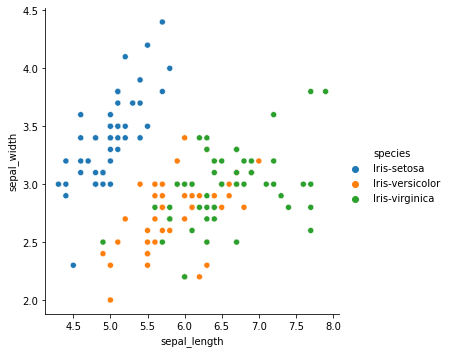

In [4]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

- From the above plot it is difficult to seperate plane for the clusters
- To get more details of plot I used PCA that breakdowns 4 columns into 2 columns 

# PCA

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dfPca = pd.DataFrame(pca.fit_transform(df.iloc[:, :4]), columns=['pc1','pc2'])
dfPca
# pc1 and pc2 are the new dimentions

,pc1,pc2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


In [6]:
# joining the new dimentions to data_frame
df_final = df.join(dfPca) 
df_final

,sepal_length,sepal_width,petal_length,petal_width,species,pc1,pc2
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.684207,0.326607
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.715391,-0.169557
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.889820,-0.137346
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.746437,-0.311124
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.728593,0.333925
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1.944017,0.187415
146,6.3,2.5,5.0,1.9,Iris-virginica,1.525664,-0.375021
147,6.5,3.0,5.2,2.0,Iris-virginica,1.764046,0.078519
148,6.2,3.4,5.4,2.3,Iris-virginica,1.901629,0.115877


# Ploting the plot with new dimentions 

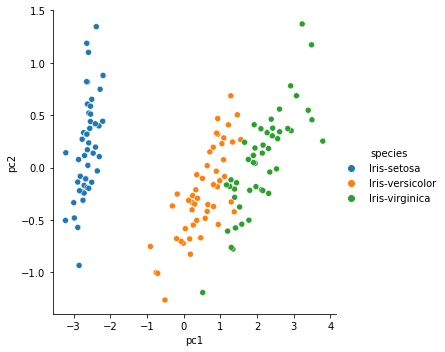

In [7]:
sns.relplot(x='pc1', y='pc2', hue='species', data=df_final)
plt.show()

 - The above plot allows us to seperate each of the clusters with a straight line
 - From the plot we can say that if co-ordinate of pc1 is less that -2.5 then the given data can be classified as Iris-setosa
 - Now lets find the line that seperates Iris-versicolor and Iris-virginica

# Trying to identify the line that seperates Iris-versicolor and Iris-virginica 

- I randomly picked two points A (-0.5, -1.5) & B (1.5, 0.5) from the above plot
- Now I tried to find line equation that passes to points A and B using y - y1 = ((y2 -y1)/(x2 - x1)) * (x -x1)
- This gave me a line equation y = x -1

### Ploting  y = x - 1 on the scatter plot  

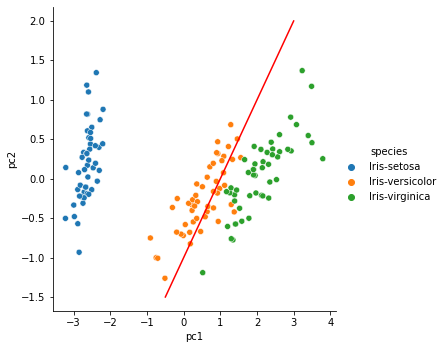

In [8]:
x = np.linspace(-0.5,3,50)
y = 1*x - 1
sns.relplot(x='pc1', y='pc2', hue='species', data=df_final)
plt.plot(x,y,'-r')
plt.show()

- From the above plot we can say that y = x - 1 seperates the clusters of Iris-versicolor and Iris-virginica
- But we still see few points lying on the line, now lets adjust the constant in y = mx +c line to get a line that seperates two clusters more clearly

### Adjusted the constant from 1 to 1.20

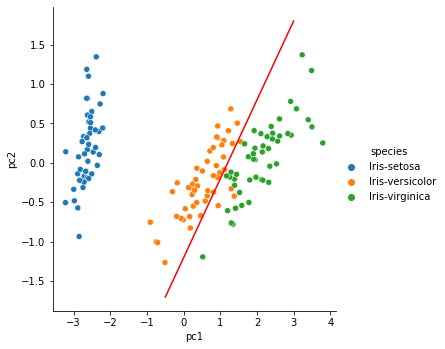

In [9]:
x = np.linspace(-0.5,3,50)
y = 1*x - 1.20
sns.relplot(x='pc1', y='pc2', hue='species', data=df_final)
plt.plot(x,y,'-r')
plt.show()

- Now the line in the above plot seperates clusters of  Iris-versicolor and Iris-virginica more clearly 
- The data points with pc1 less than -2.5 can be classified as Iris-setosa
- On top of that, we can say that all the data points that lies right side of the line can be classified as Iris-virginica and to left can be classified as Iris-versicolor

In [10]:
def predict_one(sepal_length, sepal_width, petal_length, petal_width):
    sample = df_final[(df_final['sepal_length'] == sepal_length) & (df_final['sepal_width'] == sepal_width) & (df_final['petal_length'] == petal_length) & (df_final['petal_width'] == petal_width)][['pc1','pc2']]
    pc1, pc2 = sample['pc1'].values[0],sample['pc2'].values[0]
# if pc1 is less than -2.5 the data can be classified as Iris-setosa
    if pc1 < -2.5:
        return 'Iris-setosa'
# if (pc1,pc2) are substituted in the line equation (x - y - 1.2) and if gives a positive answer then the cluster is classifies as Iris-virginica else it is classifies as Iris-versicolor
    elif pc1 - pc2 -1.2 > 0:
        return 'Iris-virginica'
    else:
        return 'Iris-versicolor'

In [11]:
predictions = pd.Series([ predict_one(*line) for line in df.iloc[:, :4].to_numpy()])
accuracy = sum(df.species == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9
